In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
file = "netflix_titles.csv"
data = pd.read_csv(file)
rename_data = data.rename(columns={"show_id": "Show ID", "type": "Type", "title": "Title", "director": "Director",
                            "cast": "Cast", "country": "Country", "date_added": "Date Added", "release_year": "Release Year",
                            "rating": "Rating", "duration": "Duration", "listed_in": "Genre", "description": "Description"})
#rename_data

In [7]:
clean_data = rename_data.replace(np.NaN) #, 'n') 
#clean_data.head(15)

In [20]:
# MOVIES DATA
movies_country = clean_data[clean_data["Type"] == 'Movie']
movies_country.head(15)

,Show ID,Type,Title,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Genre,Description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,"Richard Finn, Tim Maltby",Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...
10,80169755,Movie,Joaquín Reyes: Una y no más,José Miguel Contreras,Joaquín Reyes,"United States, United Kingdom, Denmark, Sweden","September 8, 2017",2017,TV-MA,78 min,Stand-Up Comedy,Comedian and celebrity impersonator Joaquín Re...
11,70299204,Movie,Kidnapping Mr. Heineken,Daniel Alfredson,"Jim Sturgess, Sam Worthington, Ryan Kwanten, A...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2015,R,95 min,"Action & Adventure, Dramas, International Movies","When beer magnate Alfred ""Freddy"" Heineken is ..."
12,80182480,Movie,Krish Trish and Baltiboy,Daniel Alfredson,"Damandeep Singh Baggan, Smita Malhotra, Baba S...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2009,TV-Y7,58 min,Children & Family Movies,"A team of minstrels, including a monkey, cat a..."
13,80182483,Movie,Krish Trish and Baltiboy: Battle of Wits,"Munjal Shroff, Tilak Shetty","Damandeep Singh Baggan, Smita Malhotra, Baba S...","Netherlands, Belgium, United Kingdom, United S...","September 8, 2017",2013,TV-Y7,62 min,Children & Family Movies,"An artisan is cheated of his payment, a lion o..."


In [14]:
# CONTEO DEL NUMERO DE PELICULAS QUE HAY POR GENERO

genre_list_movie = [] 
genre_count_movie = {}

for listed in movies_country['Genre']:
    split_gen = [x.strip() for x in listed.split(',')] # este me ayuda a split y remover espacios
    #print(split_genres)
    
    # Aqui puedo hacer el diccionario para que me vaya guardando cada valor y me cuente los elementos que hay en géneros  
    # traverse for all elements 
    for i in range(len(split_gen)): 
        # check if exists in unique_list or not 
        if split_gen[i] not in genre_list_movie: 
            genre_list_movie.append(split_gen[i]) 
            
        if split_gen[i] in genre_count_movie:
            genre_count_movie[split_gen[i]] = genre_count_movie[split_gen[i]] + 1
        else:
            genre_count_movie[split_gen[i]] = 1

#genre_count_movie

In [16]:
# NUMERO DE PELICULAS POR PAIS
country_list_movie = [] 
country_count_movie = {}

for listed_in in movies_country['Country']:
    split_country = [x.strip() for x in listed_in.split(',')] # este me ayuda a split y remover espacios
    #print(split_genres)
  
    # traverse for all elements 
    for j in range(len(split_country)): 
        # check if exists in unique_list or not 
        if split_country[j] not in country_list_movie: 
            country_list_movie.append(split_country[j]) 
            
        if split_country[j] in country_count_movie:
            country_count_movie[split_country[j]] = country_count_movie[split_country[j]] + 1
        else:
            country_count_movie[split_country[j]] = 1
            
#country_count_movie

In [11]:
# RELACION DE PAISES CON SUS NUMEROS DE PELICULAS POR GENERO

matrizMov = np.zeros((len(country_list_movie),len(genre_list_movie)))
ctemp = movies_country['Country'].values
gtemp = movies_country['Genre'].values

for i in range(len(ctemp)):
    #print(i)
    cstmp=ctemp[i].split(',')
    #print(cstmp)
    for k in range(len(cstmp)):
        gctmp=gtemp[i].split(',')
        #print(gctmp)
        for j in range(len(gctmp)):
            try:
                matrizMov[country_list_movie.index(cstmp[k].strip()),genre_list_movie.index(gctmp[j].strip())]=matrizMov[country_list_movie.index(cstmp[k].strip()),genre_list_movie.index(gctmp[j].strip())]+1
            except:
                print('valor raro')

In [12]:
df_movies = pd.DataFrame(data=matrizMov, index=country_list_movie, columns=genre_list_movie)
df_movies

,Children & Family Movies,Comedies,Stand-Up Comedy,International Movies,Sci-Fi & Fantasy,Thrillers,Action & Adventure,Dramas,Cult Movies,Independent Movies,Romantic Movies,Documentaries,Horror Movies,Music & Musicals,Anime Features,Faith & Spirituality,LGBTQ Movies,Movies,Classic Movies,Sports Movies
United States,283.0,460.0,203.0,137.0,135.0,205.0,249.0,546.0,37.0,289.0,134.0,418.0,146.0,85.0,4.0,30.0,39.0,37.0,61.0,88.0
India,20.0,254.0,2.0,736.0,11.0,75.0,128.0,546.0,4.0,129.0,92.0,38.0,33.0,98.0,0.0,4.0,2.0,3.0,12.0,16.0
South Korea,5.0,10.0,3.0,36.0,4.0,11.0,15.0,24.0,1.0,2.0,1.0,4.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
China,10.0,24.0,1.0,60.0,11.0,4.0,47.0,26.0,1.0,1.0,9.0,6.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
United Kingdom,32.0,70.0,19.0,131.0,28.0,43.0,59.0,125.0,5.0,53.0,23.0,112.0,22.0,25.0,0.0,5.0,4.0,4.0,11.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kazakhstan,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Armenia,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mongolia,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bermuda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# TOP 10 producing countries DEL TOTAL DE PELICULAS
country_df_movie = pd.DataFrame.from_dict(country_count_movie, orient='index', columns=['Total Data'])
sorted_countries_movie = country_df_movie.sort_values(by=['Total Data'], ascending=False)
sorted_countries_movie.head(10)

,Total Data
United States,2017
India,816
United Kingdom,401
Canada,216
France,212
Spain,137
Germany,131
Hong Kong,98
Mexico,92
China,87


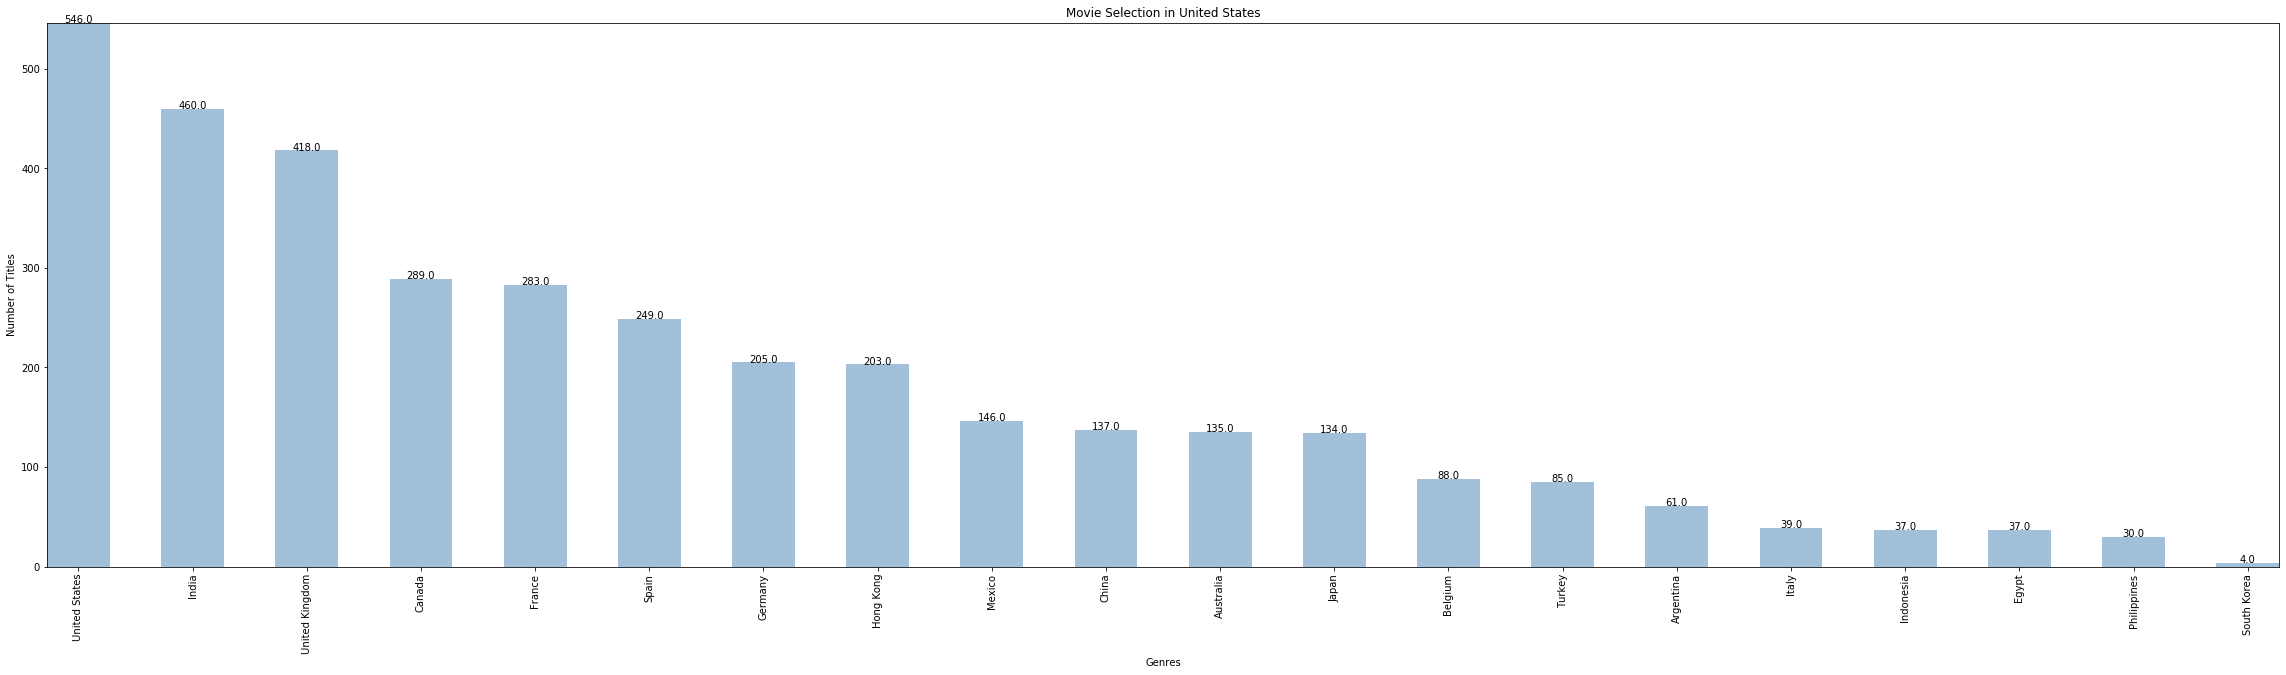

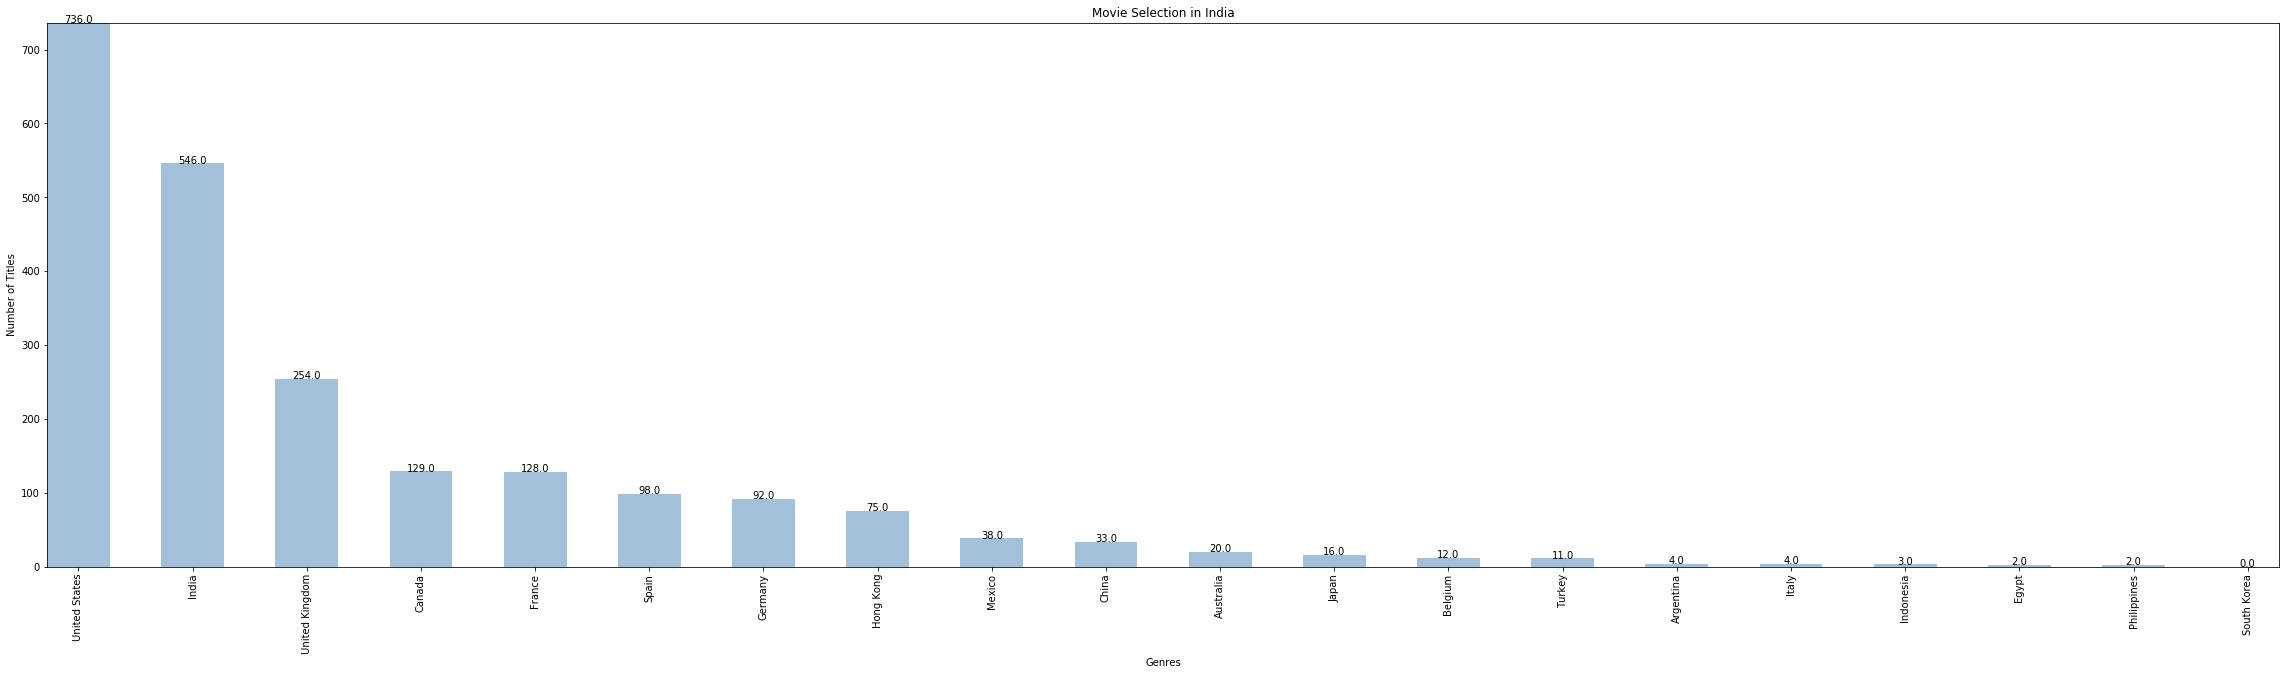

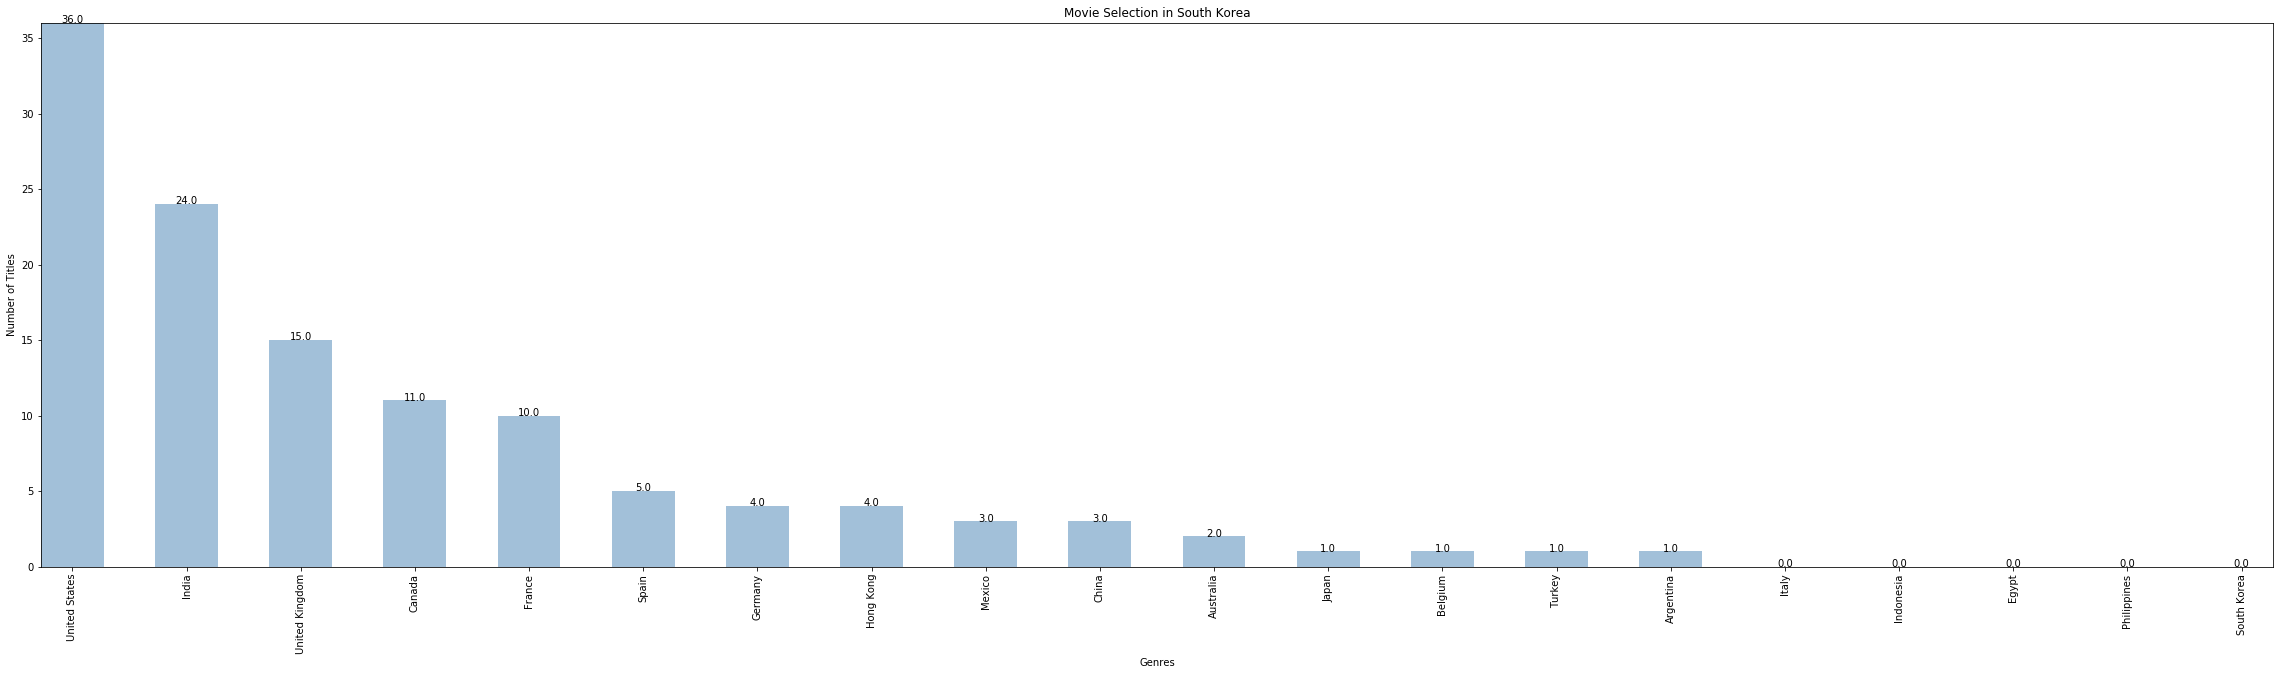

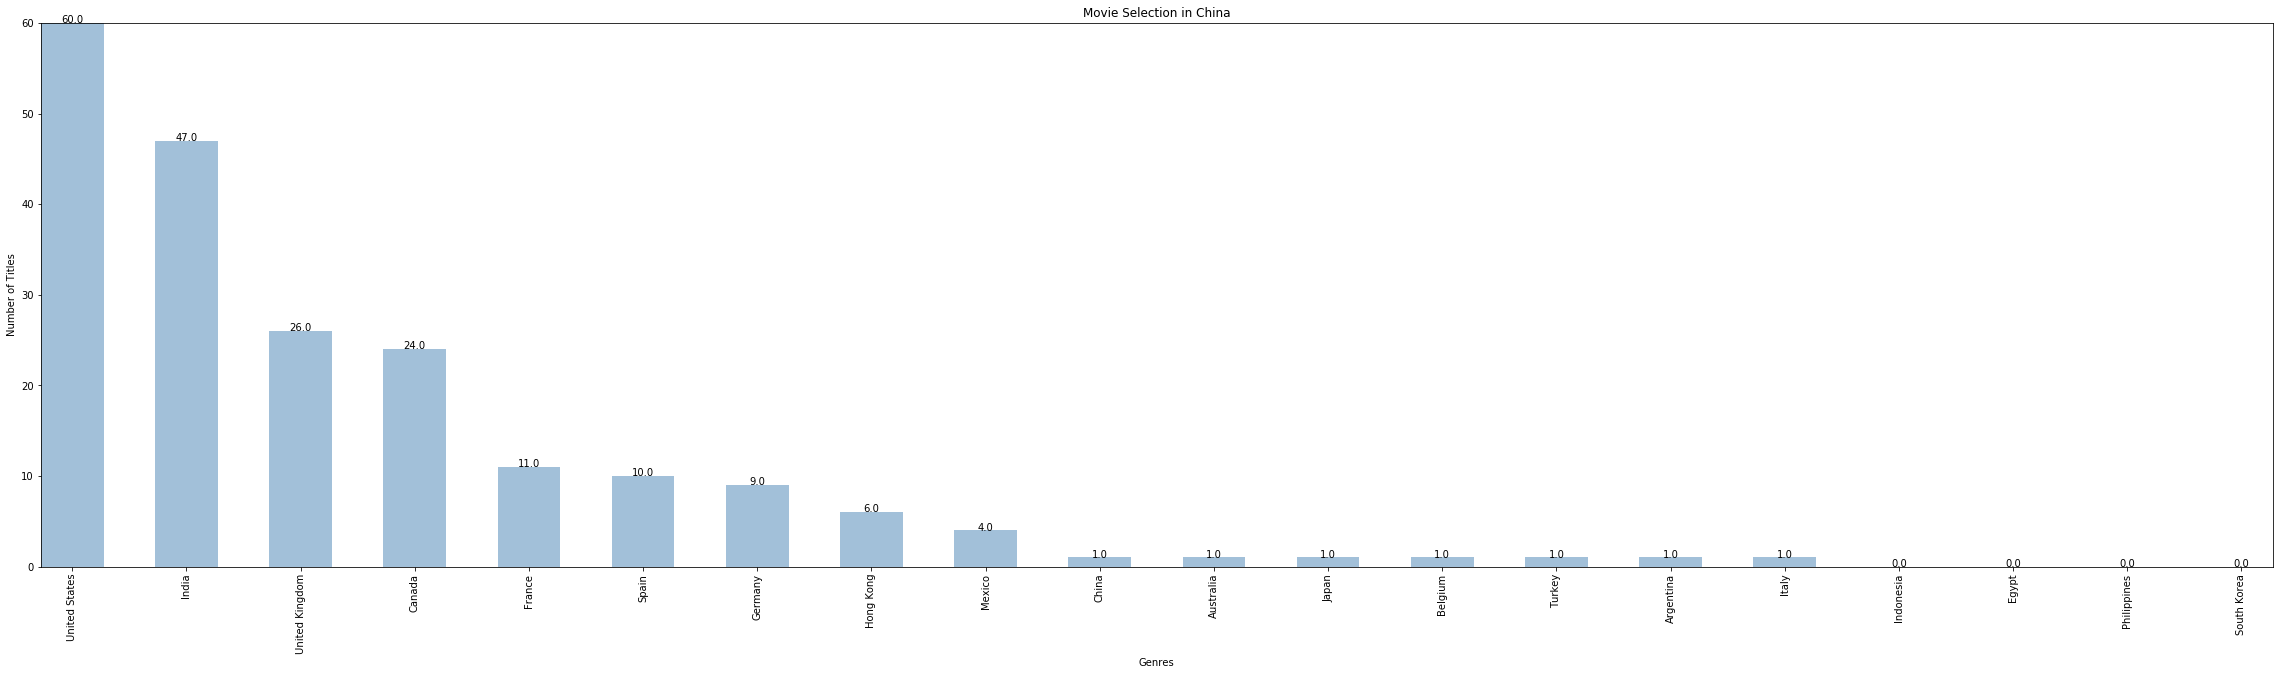

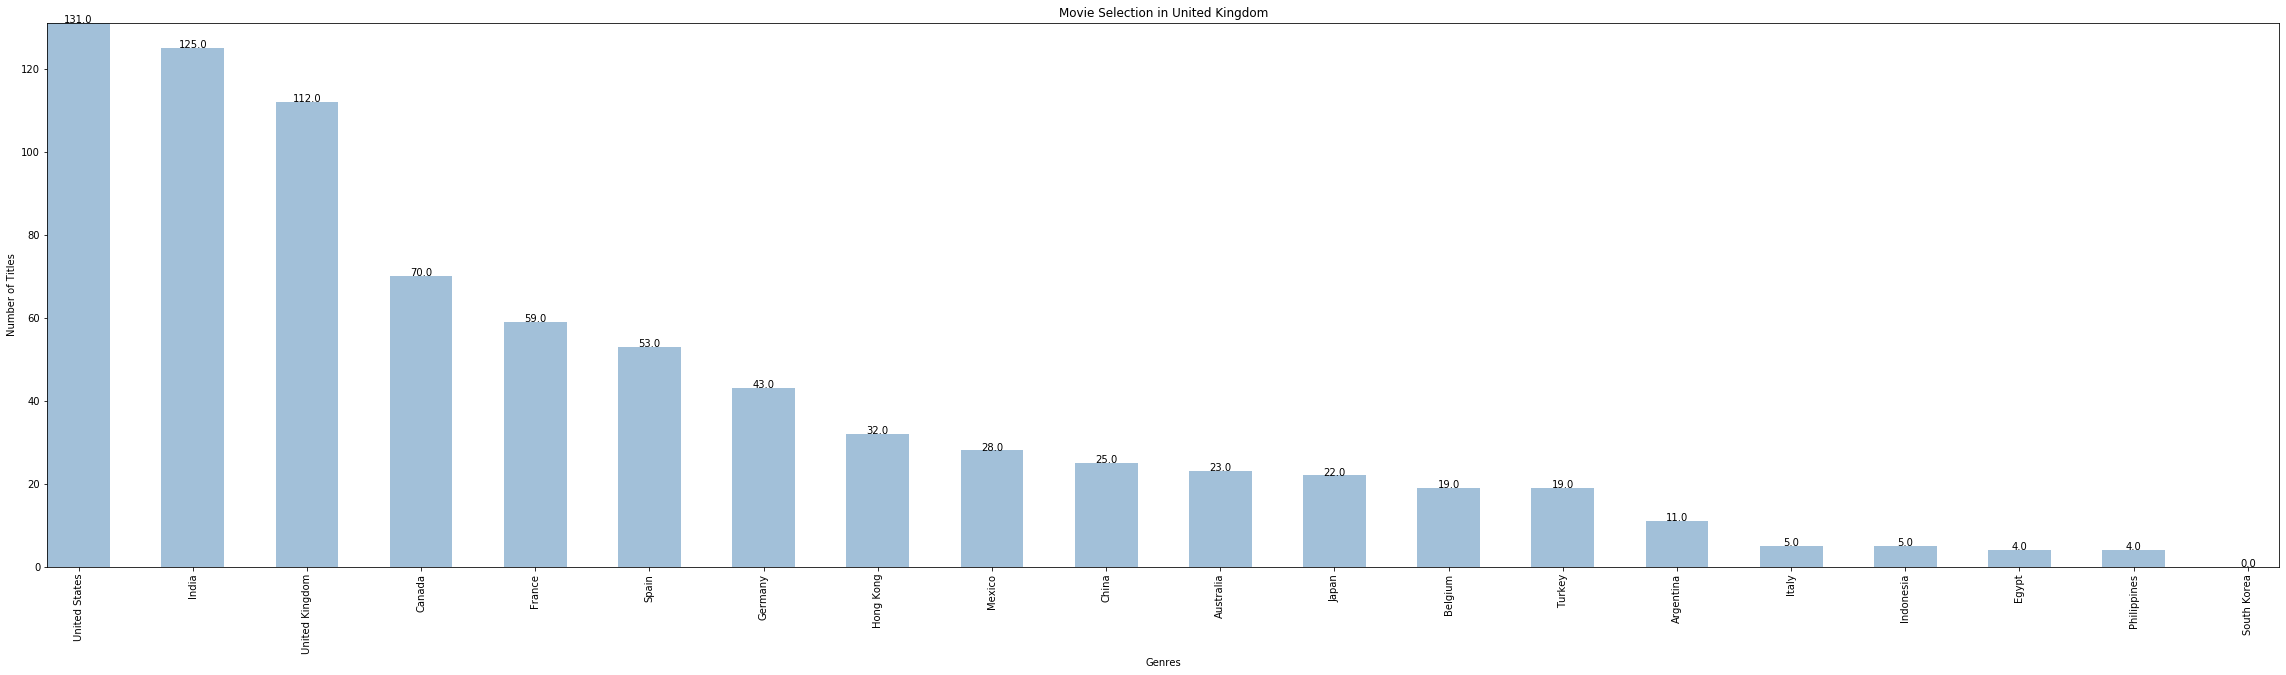

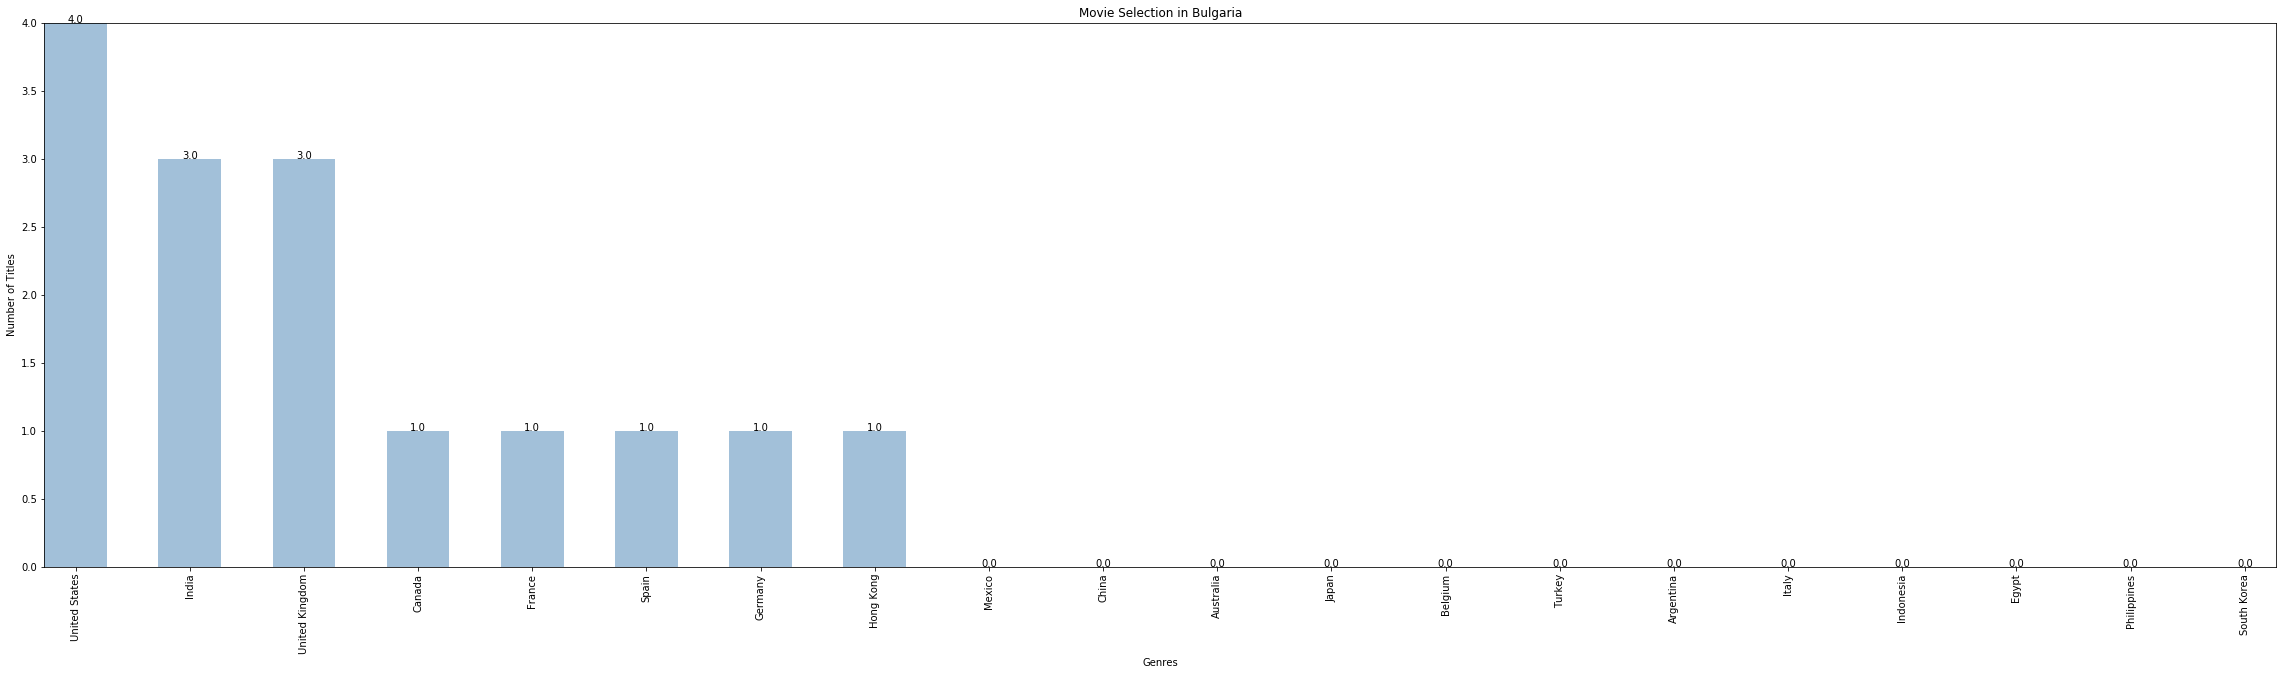

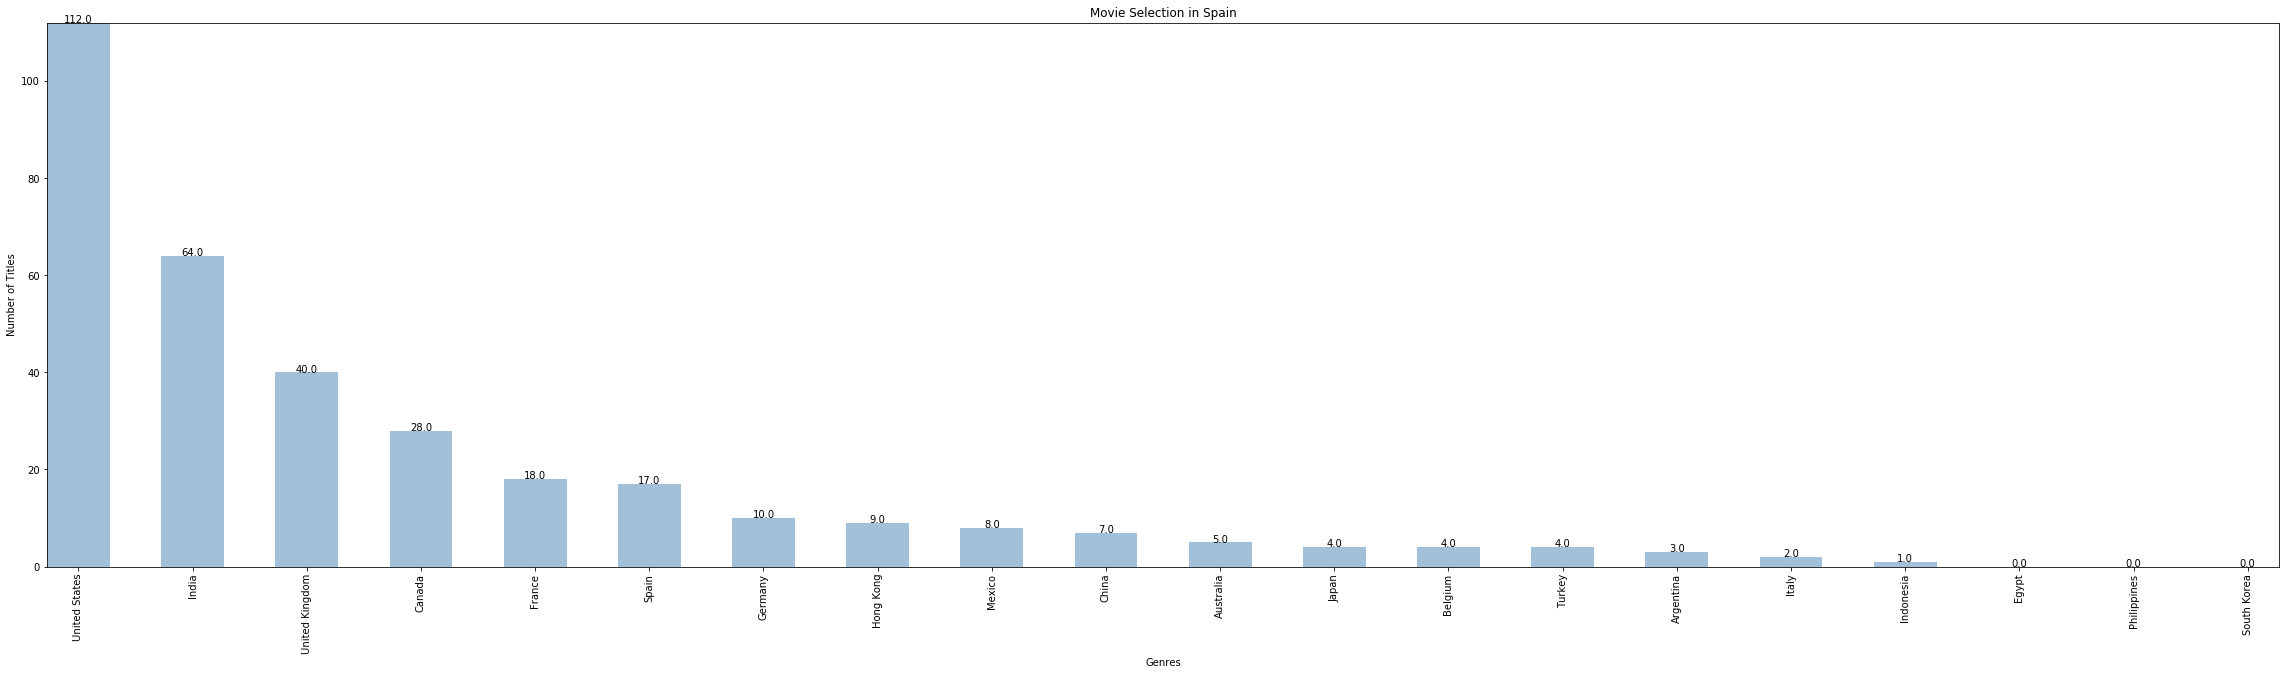

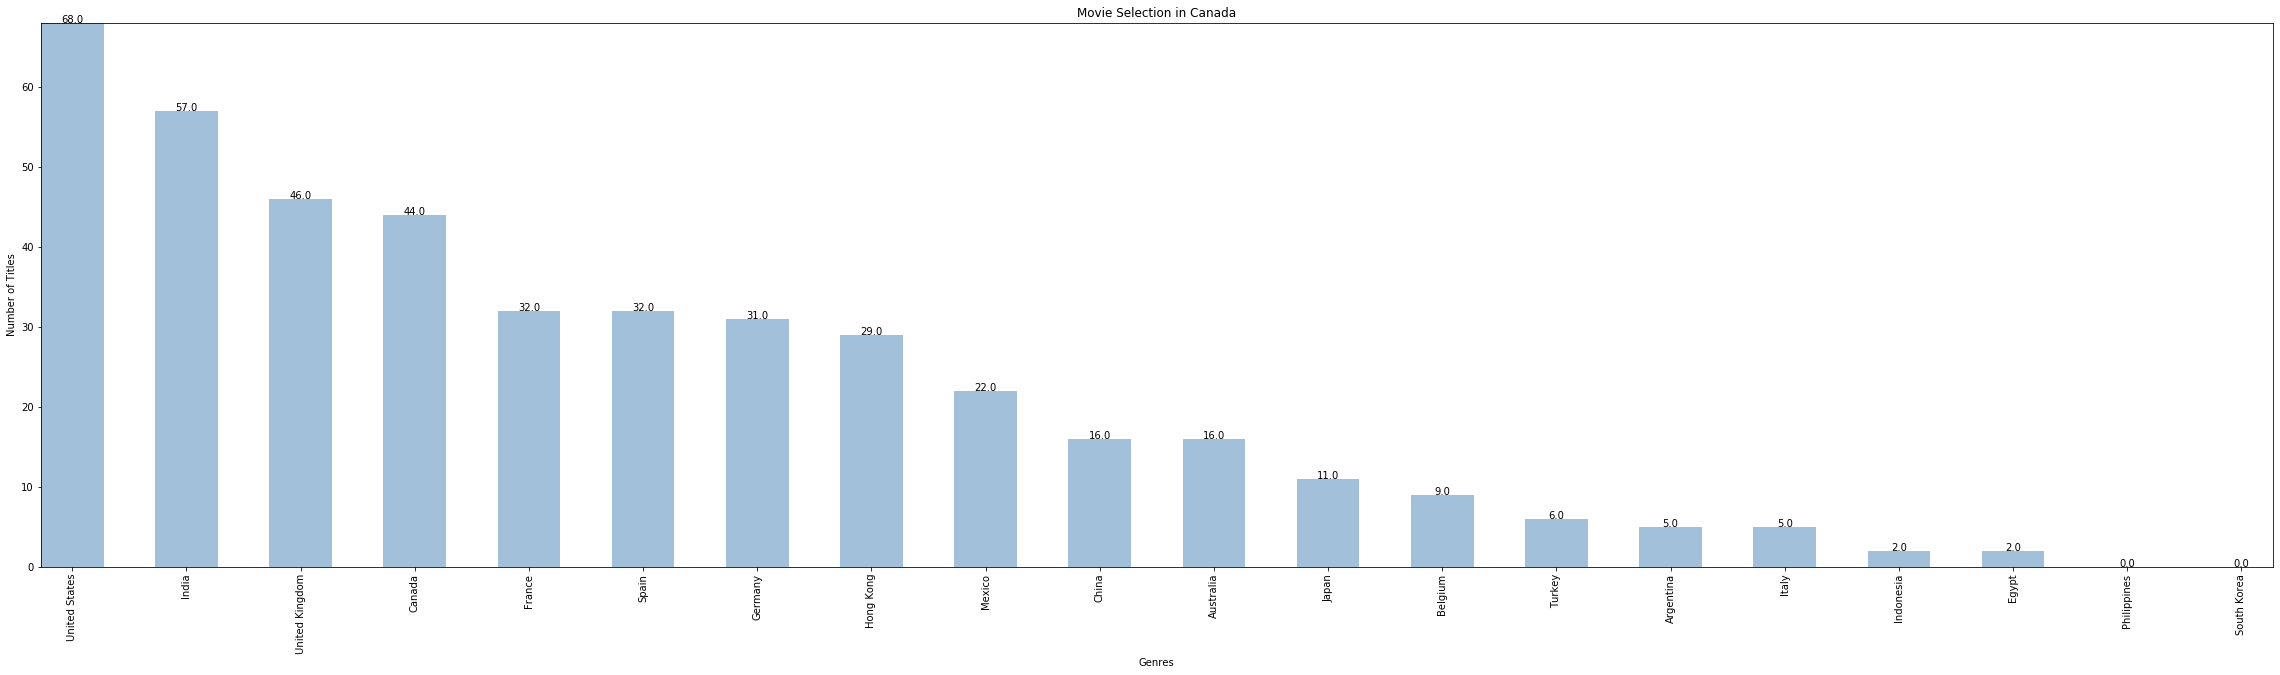

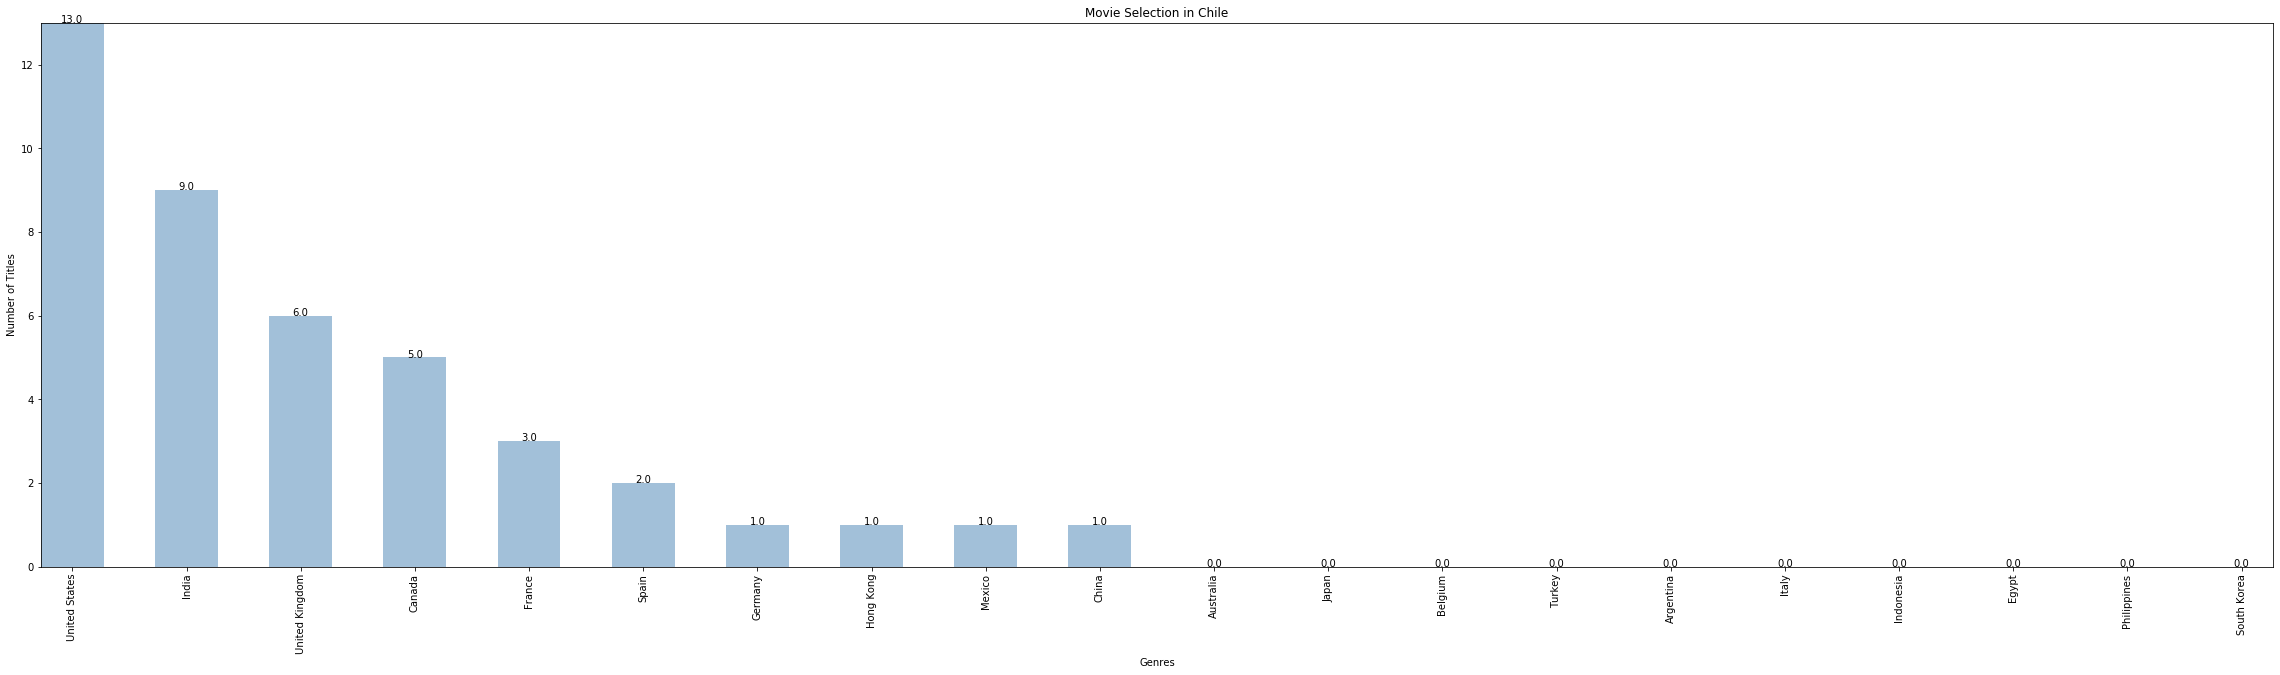

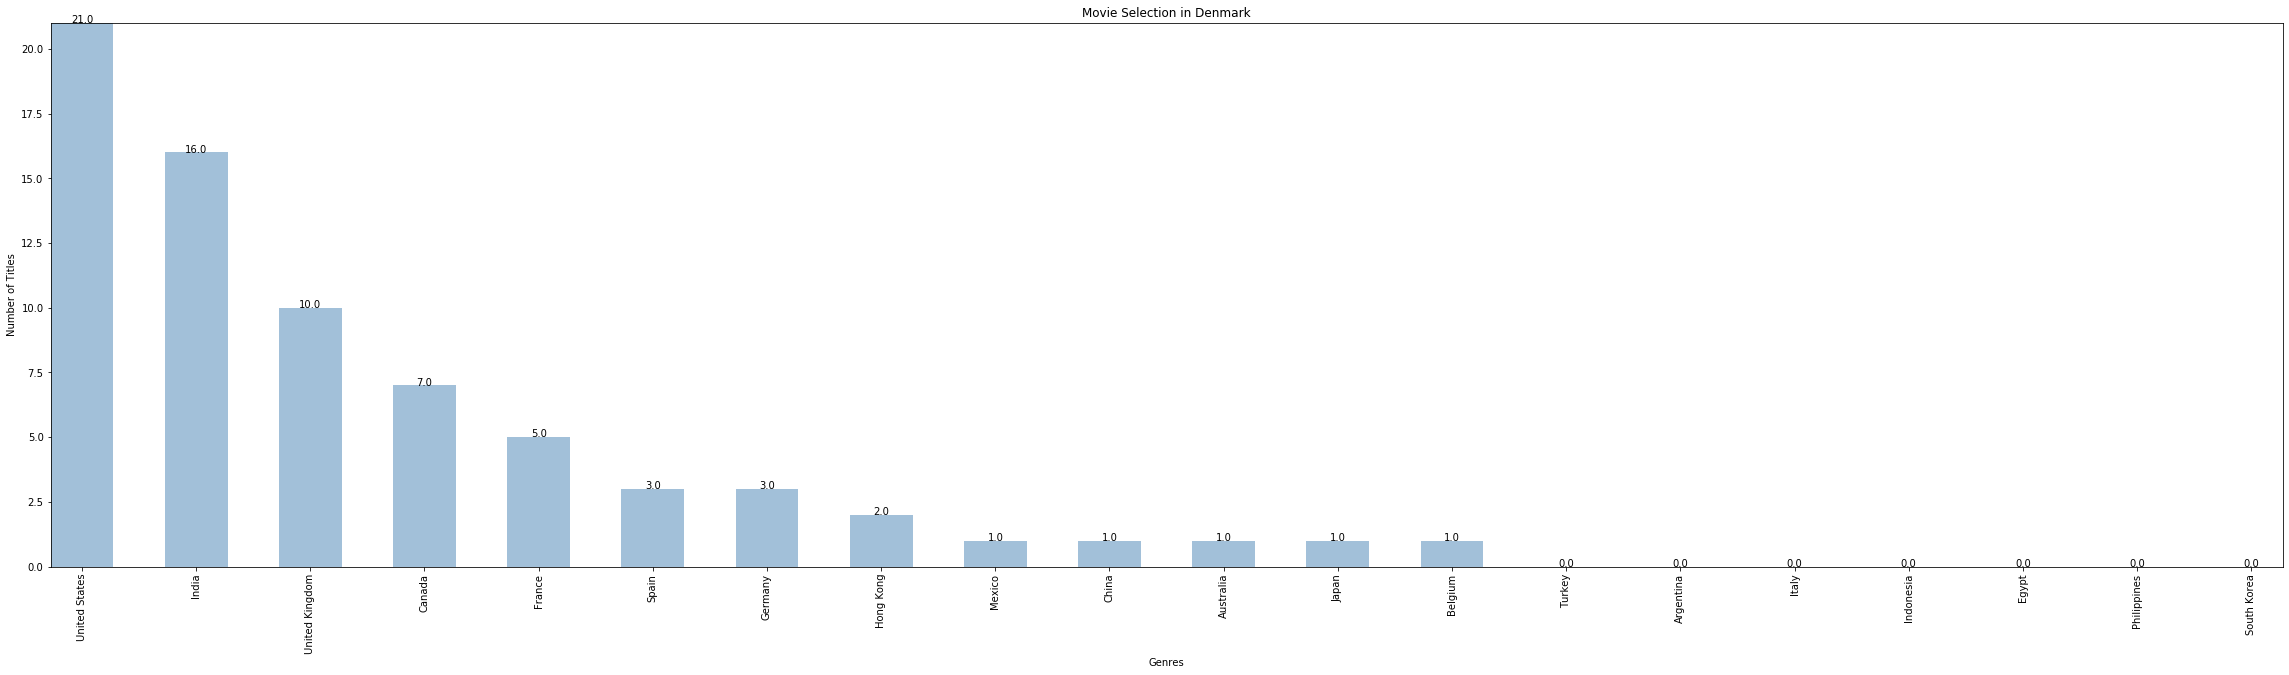

In [19]:
# GRAFICAS DEL CONTEO DE GENEROS POR PAIS
for a in range(10):
    # Data
    select_country =df_movies.index[a]
    country_genres = df_movies.iloc[a,:]
    sorted_genres = pd.DataFrame(country_genres).sort_values(by=select_country, ascending=False)
    
    # Plot
    x_values = np.arange(len(sorted_genres[select_country]))
    tick_glocations = [value for value in x_values]
    width = 0.55
    # Create a list indicating where to write x labels and set figure size to adjust for space
    plt.figure(figsize=(40,10))
    plt.bar(x_values, sorted_genres[select_country], width=width, color='steelblue', alpha=0.5) 
    plt.xticks(tick_glocations, sorted_countries_movie.index, rotation="vertical")
    plt.autoscale(tight=True)
    plt.xlabel('Genres')
    plt.ylabel('Number of Titles')
    plt.title('Movie Selection in ' + select_country)

    for i, v in enumerate(sorted_genres[select_country]):
        plt.text(i, v, str(v), color='k', ha='center')
        
    plt.savefig('Movies_fig/Movie_country_' + str(a) + '.png')
